## Welcome to the SolPOC Notebook !
### In a way to pick up the software, we propose you to learn and test the key features in a way to be familiar with the software before usage.<br>

# Chapter 4 : Calculate with solar properties

Now that we know some ways to parameter an exerience, let's move forward with an experience to calculate the Solar Absorptance of a stack of materials.

First, let's put some context with initializing values :

In [1]:
import solpoc as sol
import numpy as np
import matplotlib.pyplot as plt
try:
    from scipy.integrate import trapezoid
except ImportError:
    from scipy.integrate import trapz as trapezoid

In [26]:
Mat_Stack = ['Fe', 'Au', 'SiO2']
d_Stack = [[1000000, 150, 100]] #thin layer thicknesses in nm
Wl = np.arange(280, 2505, 5) #Wavelength array in nm
Ang = 0 #incidence angle on the thin layer stack in degrees

In a way to facilitate the variable managing into the program and threw the different functions, we created a dictionnary called parameters in which we stock the variables initialized at the begining of the experience :

In [27]:
parameters = {
    'Mat_Stack' : Mat_Stack,
    'd_Stack' : d_Stack,
    'Wl' : Wl,
    'Ang' : Ang,}

Now, we can add the Solar Spectrum as a parameter of our experience ! As for the materials, the Solar Spectra datas are installed into the SolPOC package. They are automatically present. If you want to consult them, read the 'Materials' folder on Github ! Here, you can read the SolSpec.txt file for example !

In [ ]:
Wl_Sol, Sol_Spec, name_Sol_Spec = sol.open_SolSpec('Materials/SolSpec.txt','GT')

You can change the solar spectrum type by changing the 'GT' by another spectrum (GHI, DNI...), see in User Guide or litterature for more informations. The Solar spectra present are the ASTM G-173-03 standards.

Sol_Spec is the variable which contains the Solar spectrum. To avoid software error should interpolate it to have the save wavelengths as Wl and unpdate the parameters dictionnary :

In [29]:
Sol_Spec = np.interp(Wl, Wl_Sol, Sol_Spec)
parameters.update({
    'Sol_Spec' : Sol_Spec,})

More than that, we can advice the user to take Wavelengths between 280 and 2505 **nm** with a step of 5 **nm** when working with the solar spectrum to ensure all the small variations that you can see below what are due to the Earth atmosphere are considerated.

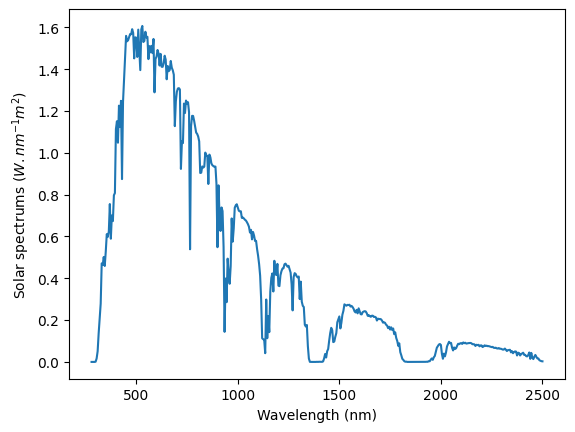

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Solar spectrums ($W.nm^{-1}m^2$)')
plt.plot(Wl, Sol_Spec)
plt.show()

Finally, let's have n_Stack and k_Stack :

In [ ]:
n_Stack, k_Stack = sol.Made_Stack(Mat_Stack, Wl)
parameters.update({
    'n_Stack' : n_Stack,
    'k_Stack' : k_Stack,})

We can now calculate R, T, A (only A is important here but they come together) :

In [32]:
R, T, A = RTA(Wl, d_Stack, n_Stack, k_Stack, Ang)

Now, we can calculate the solar absorptance. More details are present in User Guide and into litterature. We recommand you to chose the method of the integration by trapezoids, to integrate : 

In [33]:
A_Spec = A*Sol_Spec
Sol_Spec_int = trapezoid(Sol_Spec, Wl)
A_int = trapezoid(A_Spec, Wl)
A_s = A_int/Sol_Spec_int
print('A_int : ', A_int)
print('A_s : ', A_s)

A_int :  201.32076902339548
A_s :  0.202214644301779


A_int represents the flux density absorbed by the coating in **$W.m^2$**. A_s is the Solar absorptance with no unit representing the capacity of the coating to absorb solar flux density (accoding to the solar spectrum used here 'GT').

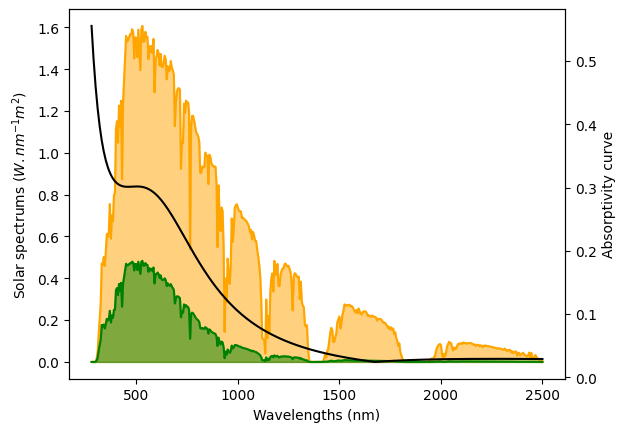

In [34]:
fig, ax1 = plt.subplots()

ax1.plot(Wl, Sol_Spec, color='orange')
ax1.fill_between(Wl, 0, Sol_Spec, where=(Sol_Spec > 0), alpha=0.5, color='orange')
ax1.plot(Wl, A_Spec, color='green')
ax1.fill_between(Wl, 0, A_Spec, where=(A_Spec > 0), alpha=0.5, color='green')

ax2 = ax1.twinx()
ax2.plot(Wl, A, color='black')

ax1.set_xlabel('Wavelengths (nm)')
ax1.set_ylabel('Solar spectrums ($W.nm^{-1}m^2$)')
ax2.set_ylabel('Absorptivity curve')
plt.show()

We can see on this graph the solar spectrum in orange and the solar absorptance of the stack in green.

Finally, A_s is the result of the area of the solar spectrum divided by the area of the absorbtance of the stack.

[Chapter 5](SolPOC_Chapter_5.ipynb)